# DSE 210 Final Supporting Calculations

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from math import sqrt

In [2]:
%matplotlib inline

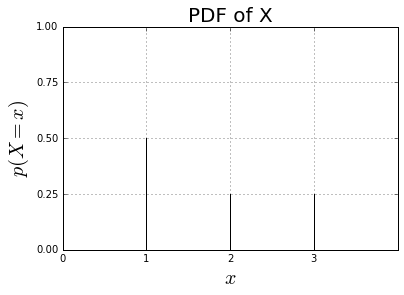

In [3]:
# Q3 part c
# pdf plot 
plt.plot((0, 0), (0, 1), 'k-',
         (4, 4), (0, 0), 'k-',
         (1, 1), (0, 0.5), 'k-',
         (2, 2), (0, 0.25), 'k-',
         (3, 3), (0, 0.25), 'k-')
plt.xticks(np.arange(0, 4, 1.0))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$p(X = x)$', fontsize=20)
plt.title('PDF of X', fontsize=20)
plt.grid()
plt.show;

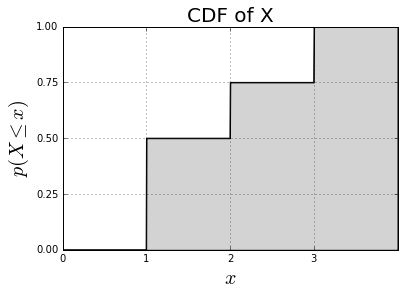

In [4]:
# Q3 part c
# cdf plot 
x = np.linspace(0,4,1000)
cdf_x = np.concatenate([np.repeat(0,250),
                        np.repeat(0.5,250),
                        np.repeat(0.75,250),
                        np.repeat(1.0,250)])
cdf_0 = np.repeat(0, 1000)

plt.plot(x, cdf_x, 'k-')
plt.fill_between(x, cdf_0, cdf_x, where=cdf_x >= cdf_0, facecolor='lightgrey', interpolate=True)


plt.xticks(np.arange(0, 4, 1.0))
plt.yticks(np.arange(0, 1.1, 0.25))
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$p(X \leq x)$', fontsize=20)
plt.title('CDF of X', fontsize=20)
plt.grid()
plt.show;

In [5]:
# Q6 part a
A = norm(0, 1)
B = norm(5, 2)

print 'p(x = 2.5 | A) =', A.pdf(2.5)
print 'p(x = 2.5 | B) =', B.pdf(2.5)

p_A = 2.0/3.0 * A.pdf(2.5)
p_B = 1.0/3.0 * B.pdf(2.5)

print 'p(A | x = 2.5) =',p_A / (p_A + p_B)

p(x = 2.5 | A) = 0.0175283004936
p(x = 2.5 | B) = 0.0913245426945
p(A | x = 2.5) = 0.277387907451


decision boundary: 2.18092601508


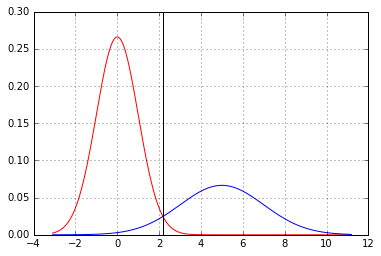

In [6]:
# Q6 part b
# plot 
x = np.linspace(A.ppf(0.001),B.ppf(0.999), 1000)
prob_A = 2.0/3.0
prob_B = 1.0/3.0

# calculate decision boundary as point where p(A)*p(x|A) == p(B)*p(x|B)
diff = prob_A * A.pdf(x) - prob_B * B.pdf(x)
dec_bdry = x[np.where(diff == np.min(abs(diff)))[0]][0]
print 'decision boundary:',dec_bdry

plt.plot(x, prob_A*A.pdf(x),'r-', x, prob_B*B.pdf(x),'b-',(dec_bdry, dec_bdry), (0, 0.3), 'k-')
plt.grid()
plt.show;

cluster centers: [ 1.015  0.005]


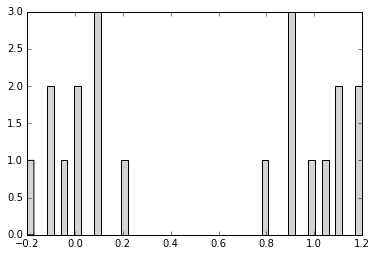

In [7]:
# Q7
data = [-0.1, -0.2, 0.1, 0.2, 0, 0.1, -0.1, 0, -0.05, 0.1, 1.05, 1.1, 0.9, 0.8, 0.9, 1, 1.2, 1.1, 1.2, 0.9]
data = np.reshape(data, (len(data),1))

# fit 2 clusters and identify cluster centers
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
print 'cluster centers:',kmeans.cluster_centers_.T[0]

# plot data
plt.hist(data, bins = 50, color='lightgrey')
plt.show;

best model has 2 mixtures
weights: [ 0.5  0.5]
means: [ 0.005  1.015]
variances: [ 0.014225  0.018025]


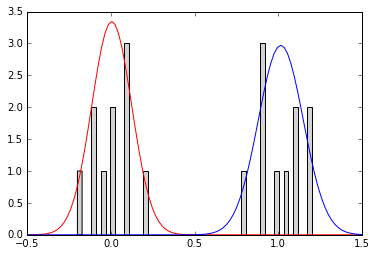

In [8]:
# Q8

# create several models and see which is best
models = []
for i in range(1,10):
    m = GMM(i).fit(data)
    models.append(m)

# find model with best AIC
AIC = [m.aic(data) for m in models]
BIC = [m.bic(data) for m in models]
best_model_aic = models[np.argmin(AIC)] # lower AIC is better
best_model_bic = models[np.argmin(BIC)] # lower BIC is better

print 'best model has %s mixtures' % str(1+np.argmin(BIC))
print 'weights:',best_model_bic.weights_.T
print 'means:',best_model_bic.means_.T[0]
print 'variances:',best_model_bic.covars_.T[0]

# plot best model
m1 = norm(best_model_bic.means_[0][0],best_model_bic.covars_[0][0]**0.5)
m2 = norm(best_model_bic.means_[1][0],best_model_bic.covars_[1][0]**0.5)

figure, ax = plt.subplots()
x = np.linspace(-0.5, 1.5, 100)
ax.hist(data, bins = 50, color='lightgrey')
ax.plot(x, m1.pdf(x),'r-')
ax.plot(x, m2.pdf(x),'b-')
plt.show;

In [9]:
# Q10
men_pct = np.array([0.438, 0.417, 0.146])
women_pct = np.array([0.164, 0.709, 0.127])

men_obs = men_pct*48
women_obs = women_pct*55
tot_obs = men_obs + women_obs

tot_pct = tot_obs / sum(tot_obs)
men_exp = 48*tot_pct
women_exp = 55*tot_pct

chi2_stat = sum((men_obs - men_exp)**2/men_exp) + sum((women_obs - women_exp)**2/women_exp)
print 'chi2 stat:',chi2_stat

# find critical value and p-value associated with chi2 stat
crit = chi2.ppf(q = 0.95, # Find the critical value for 95% confidence*
                      df = 2)   # Df = number of variable categories - 1

print 'Critical value:',crit

p_value = 1 - chi2.cdf(x=chi2_stat, df=2)
print 'p value:',p_value

chi2 stat: 10.4845183289
Critical value: 5.99146454711
p value: 0.00528829619958
